<a href="https://colab.research.google.com/github/Cknowles11/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Copy_of_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [2]:
import math
import numpy as np
import pandas as pd

In [3]:
sales = [3505,2400,3027,2798,3700,3250,2689]

In [4]:
total = sum(sales)
total

21369

In [5]:
mean_sales = total/len(sales)
mean_sales

3052.714285714286

In [6]:
def subtract_mean(number):
  return number - mean_sales
lambda x: x-mean_sales

<function __main__.<lambda>>

In [7]:
distances = list(map(subtract_mean, sales))
distances

[452.2857142857142,
 -652.7142857142858,
 -25.71428571428578,
 -254.71428571428578,
 647.2857142857142,
 197.28571428571422,
 -363.7142857142858]

In [8]:
squared_distances = list(map(lambda x: x**2, distances))
squared_distances

[204562.36734693873,
 426035.9387755103,
 661.2244897959217,
 64879.36734693881,
 418978.7959183673,
 38921.65306122446,
 132288.0816326531]

In [9]:
list_length = len(squared_distances)

In [10]:
variance_sales = sum(squared_distances)/list_length
variance_sales

183761.06122448976

In [11]:
std_sales = math.sqrt(variance_sales)
std_sales

428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [12]:
customers = [127,80,105,92,120,115,93]

In [13]:
pd.DataFrame(np.cov(sales,customers))

,0,1
0,214387.904762,7604.357143
1,7604.357143,290.952381


In [14]:
sales_cust = pd.DataFrame({'sales':sales})
sales_cust['customers'] = pd.Series(customers)
sales_cust


,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [15]:
sales_cust.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [16]:
total_cust = sum(customers)
mean_cust = total_cust/len(customers)
mean_cust

104.57142857142857

In [17]:
def subtract_mean(number):
  return number - mean_cust
lambda x: x-mean_cust

<function __main__.<lambda>>

In [18]:
distances1 = list(map(subtract_mean, customers))
distances1

[22.42857142857143,
 -24.57142857142857,
 0.4285714285714306,
 -12.57142857142857,
 15.42857142857143,
 10.42857142857143,
 -11.57142857142857]

In [19]:
squared_distances1 = list(map(lambda x: x**2, distances1))
squared_distances1

[503.0408163265307,
 603.7551020408163,
 0.18367346938775683,
 158.04081632653057,
 238.0408163265307,
 108.75510204081637,
 133.89795918367344]

In [20]:
list_length1 = len(squared_distances1)

In [21]:
variance_cust = sum(squared_distances1)/list_length1
variance_cust

249.3877551020408

In [22]:
std_cust = math.sqrt(variance_cust)
std_cust

15.792015549069118

In [23]:
print(std_cust, std_sales)

15.792015549069118 428.67360686714756


In [24]:
factory = pd.DataFrame({'sales': sales})

In [25]:
factory['customers'] = pd.Series(customers)
factory

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [26]:
cov_sc = factory['sales'].cov(factory['customers'])
cov_sc

7604.357142857142

In [27]:
denom = std_sales * std_cust
denom

6769.620265121536

In [28]:
corr_sc = cov_sc/denom
corr_sc

1.123306307450706

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [29]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [30]:
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [31]:
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [32]:
import matplotlib.pyplot as plt

In [33]:
vector_1 = [2,2]
vector_2 = [1,-1]

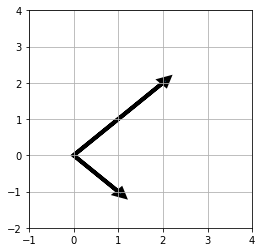

In [34]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1,4)          
plt.ylim(-2,4)

# Plot the vectors
for vect in [vector_1, vector_2]:
  plt.arrow(0,0, vect[0], vect[1],
            head_width=.2,
            head_length=.2, 
            linewidth=4)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [35]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])
np.dot(a,b)

-40

In [36]:
#These vectors are not orthogonal because their dot product is not equal to 0

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [37]:
c = np.array([2,-15,6,20])
np.dot(c,c)

665

In [38]:
np.matmul(c.T,c)

665

In [39]:
np.linalg.norm(c)**2

665.0

In [40]:
#All of their outcomes are equal to 665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [41]:
f = np.array([4,12,11,9,2])

In [42]:
norm_f = np.linalg.norm(f)

In [43]:
f_hat = f/norm_f
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [44]:
v1 = [1,4,9]
v2 = np.multiply(v1,2)

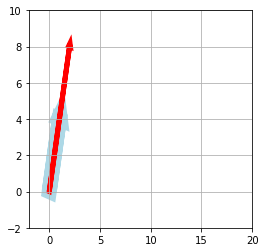

In [45]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,20)          
plt.ylim(-2,10)

for myvect, mycolor, width in [(v1, 'lightblue', 15), (v2, 'red', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

In [46]:
v3 = [-2,-3]
v4 = [0,-3]

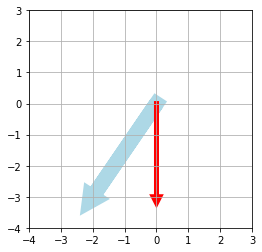

In [47]:

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-4,3)          
plt.ylim(-4,3)

for myvect, mycolor, width in [(v3, 'lightblue', 15), (v4, 'red', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [48]:
g = np.array([1,2])
h = np.array([4,8])

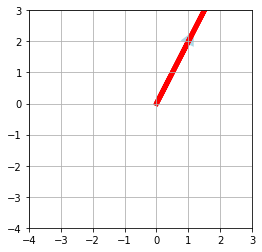

In [49]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-4,3)          
plt.ylim(-4,3)

for myvect, mycolor, width in [(g, 'lightblue', 5), (h, 'red', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

In [50]:
#The span of these 2 vectors is infinite since they are superimposed.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [51]:
l = np.array([1,2,3])
m = np.array([-1,0,7])
n = np.array([4,8,2])

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [52]:
vec_1 = [-2,2]
vec_2 = [2,2]

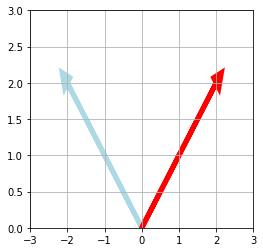

In [53]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(0,3)

for myvect, mycolor, width in [(vec_1, 'lightblue', 5), (vec_2, 'red', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

## 6.2 What does it mean to form a basis?

To form a basis means to form a subset of vectors that span the vector space and are linerly independent.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [55]:
P = np.array([[1,2,3], [-1,0,7], [4,8,2]])
P

array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

In [57]:
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

It tells us the number of dimensions that an output of a matrix has.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [58]:
v = np.array([1,3])
w = np.array([-1,2])

In [59]:
w_dot_v = np.dot(w,v)
v_dot_v = np.dot(v,v)

In [60]:
fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction,v)
print(projection)

[0.5 1.5]


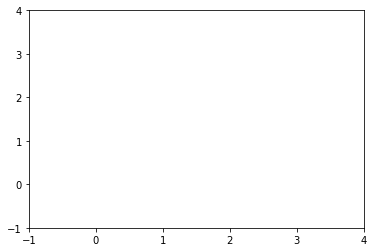

In [61]:
plt.xlim(-1,4)          
plt.ylim(-1,4)
axes = plt.gca()

In [62]:
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


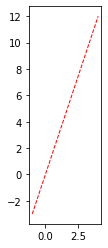

In [66]:
axes = plt.gca()
plt.axes().set_aspect('equal')


plt.plot(x_vals, y_vals, '--', color='r', linewidth=1);

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

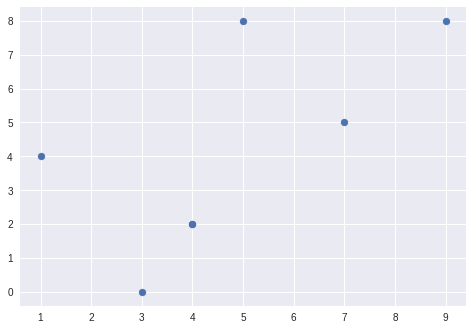

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()